In [1]:
import pandas as pd
import plotly
import matplotlib
import matplotlib.pyplot as plt
import datetime

In [2]:
df = pd.read_csv('viewedHistory.csv', sep=';', error_bad_lines=False, engine='python')

Skipping line 806: unexpected end of data


In [3]:
df

title  \
0                                    Season 2: "Beryl"   
1                                   Season 2: "Lisbon"   
2                         Season 2: "A Company of Men"   
3                             Season 2: "Misadventure"   
4                                 Season 1: "Gloriana"   
5                                          War Machine   
6                                                Seven   
7                             Season 3: "Cri de Coeur"   
8                                Season 1: "Assassins"   
9                              Season 1: "Pride & Joy"   
10                   Season 1: "Scientia Potentia Est"   
11                               Season 1: "Gelignite"   
12                       Season 1: "Smoke and Mirrors"   
13                                  Season 1: "Part 2"   
14                                  Season 1: "Part 1"   
15                                 Season 1: "Freedom"   
16                              Season 4: "Favourites"   
17                               Season 4: "Fairytale"   
18                       Season 4: "The Balmoral Test"   
19                              Season 4: "Gold Stick"   
20                              Season 1: "Spirit Day"   
21                            Season 1: "Making Moves"   
22                      Season 1: "Superman This S**t"   
23                         Season 1: "Valentine's Day"   
24                               Season 1: "Safety On"   
25                      Season 1: "Relationship Goals"   
26                                  Season 1: "See Me"   
27                          Season 1: "Brooklyn, 2020"   
28   Season 1: "The Present, Eternity and the Actio...   
29                               Season 1: "Ayahuasca"   
..                                                 ...   
774                               Season 3: "Miracles"   
775                     Season 3: "Everything Must Go"   
776                            Season 3: "Rebound Bro"   
777                               Season 3: "The Goat"   
778            Australia & New Zealand: "Joel Creasey"   
779          Australia & New Zealand: "Urzila Carlson"   
780                        Canada (EN): "DeAnne Smith"   
781                Season 3: "Sandcastles in the Sand"   
782                 Season 3: "The Chain of Screaming"   
783                                 UK: "Ellie Taylor"   
784                                   UK: "Mae Martin"   
785                          France: "Donel Jack'sman"   
786                              France: "Tania Dutel"   
787                         France: "Shirley Souagnon"   
788                              India: "Aditi Mittal"   
789                            Germany: "Enissa Amani"   
790                            Season 3: "The Bracket"   
791                           Season 3: "Ten Sessions"   
792                               Season 4: "Arkangel"   
793                          Season 4: "USS Callister"   
794                                  After Porn Ends 3   
795                              Season 1: "Episode 1"   
796                                 Season 1: "Jigsaw"   
797                                   Season 1: "Dark"   
798                            Season 3: "No Tomorrow"   
799                      Season 3: "The Platinum Rule"   
800                               Season 3: "The Yips"   
801                            Season 3: "Slapsgiving"   
802                         Black Mirror: Bandersnatch   
803                          Season 1: "Rixty Minutes"   

                                    videoTitle   movieID country  bookmark  \
0                                        Beryl  80149008      DE       833   
1                                       Lisbon  80149007      DE      3258   
2                             A Company of Men  80149006      DE      3167   
3                                 Misadventure  80149005      DE      3286   
4                                     Gloriana  80025766      

In [4]:
df['country'].value_counts()

DE    719
RU     52
ES     12
CH      9
DK      5
GE      4
PL      2
FR      1
Name: country, dtype: int64

In [5]:
df['dateStr'] = pd.to_datetime(df['dateStr'], utc=True)

In [6]:
df_2020 = df[df['dateStr']>'2019-12-31']
df_2019 = df[df['dateStr']<'2020-01-01']

In [7]:
hours_2020 = df_2020.duration.sum()/3600
days_2020 = hours_2020/24
print(f'Total time spent watching netflix in 2020: {hours_2020} hours or {days_2020} days')

Total time spent watching netflix in 2020: 348.62916666666666 hours or 14.526215277777778 days


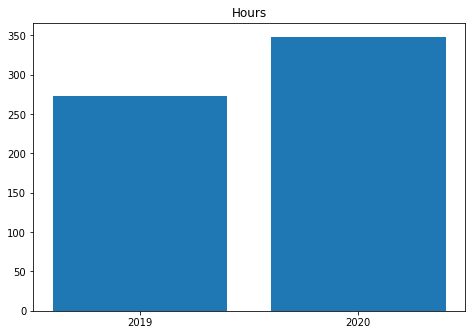

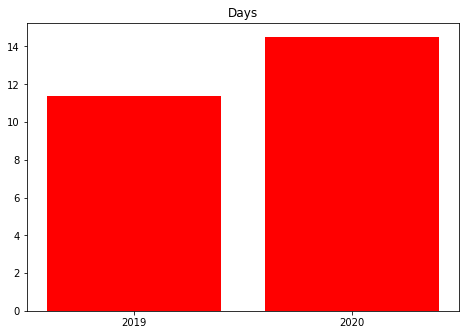

In [8]:
hours_2019 = df_2019.duration.sum()/3600
days_2019 = hours_2019/24

days = pd.DataFrame({'Year':['2019','2020'], 'Hours':[hours_2019, hours_2020], 'Days':[days_2019, days_2020]})
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(days['Year'],days['Hours'])
ax.set_title('Hours')

fig_1 = plt.figure()
ax_1 = fig_1.add_axes([0,0,1,1])
ax_1.bar(days['Year'],days['Days'], color='r')
ax_1.set_title('Days')
plt.show()

In [9]:
tv_series_2020 = df_2020[~df_2020['seriesTitle'].isnull()]
tv_series_2020 = tv_series_2020[['seriesTitle', 'duration']].groupby('seriesTitle').sum().sort_values('duration', ascending=False).reset_index()

In [10]:
tv_series_2020[:10]

seriesTitle  duration
0                 Narcos     93753
1              Community     81805
2              The Crown     51846
3       Better Call Saul     31715
4             Grand Army     28966
5            Snowpiercer     28360
6  How I Met Your Mother     26196
7                Ratched     26161
8          Sex Education     25166
9            To the Lake     24482

In [11]:
tv_series_2019 = df_2019[~df_2019['seriesTitle'].isnull()]
tv_series_2019.groupby('seriesTitle')['duration'].sum().sort_values(ascending=False)

seriesTitle
How I Met Your Mother                               56557
Good Girls                                          56190
Orange Is the New Black                             49600
13 Reasons Why                                      44714
Pose                                                36115
You                                                 33246
MINDHUNTER                                          31486
COMEDIANS of the world                              26812
Sex Education                                       24134
Black Mirror                                        22858
The Politician                                      22575
The Witcher                                         22194
Bodyguard                                           21950
GLOW                                                21612
The Spy                                             19382
Stranger Things                                     17530
Easy                                                17060
Pe

In [12]:
movies_2020 = df_2020[df_2020['seriesTitle'].isnull()]
len(movies_2020)

50

In [13]:
movies_2020['genres'] = None

/Users/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [14]:
from search import get_genres

movies_2020['genres'] = movies_2020['title'].apply(get_genres)

<Movie id:4758646[http] title:_War Machine (2017)_>

<Movie id:0114369[http] title:_Se7en (1995)_>

<Movie id:0443453[http] title:_Borat: Cultural Learnings of America for Make Benefit Glorious Nation of Kazakhstan (2006)_>

<Movie id:2235695[http] title:_Rebecca (2020)_>

<Movie id:1070874[http] title:_The Trial of the Chicago 7 (2020)_>

<Movie id:7395114[http] title:_The Devil All the Time (2020)_>

<Movie id:7846844[http] title:_Enola Holmes (2020)_>

<Movie id:7939766[http] title:_I'm Thinking of Ending Things (2020)_>

<Movie id:7550000[http] title:_Project Power (2020)_>

<Movie id:11464826[http] title:_The Social Dilemma (2020)_>

<Movie id:9777644[http] title:_Da 5 Bloods (2020)_>

<Movie id:7668870[http] title:_Searching (2018)_>

<Movie id:10276470[http] title:_Work It (2020)_>

<Movie id:10438648[http] title:_Katherine Ryan: Glitter Room (2019)_>

<Movie id:9784456[http] title:_The Kissing Booth 2 (2020)_>

<Movie id:0362227[http] title:_The Terminal (2004)_>

<Movie id:8851668[http] title:_The Lovebirds (2020)_>

<Movie id:8580274[http] title:_Eurovision Song Contest: The Story of Fire Saga (2020)_>

<Movie id:11905462[http] title:_Athlete A (2020)_>

<Movie id:0106246[http] title:_Alive (1993)_>

<Movie id:8465676[http] title:_Hannah Gadsby: Nanette (2018)_>

<Movie id:0443706[http] title:_Zodiac (2007)_>

<Movie id:1210166[http] title:_Moneyball (2011)_>

<Movie id:1632708[http] title:_Friends with Benefits (2011)_>

<Movie id:2573372[http] title:_Becoming (2020)_>

<Movie id:8727582[http] title:_Circus of Books (2019)_>

<Movie id:11987296[http] title:_Chris D'Elia: No Pain (2020)_>

<Movie id:0347149[http] title:_Howl's Moving Castle (2004)_>

<Movie id:11388406[http] title:_Horse Girl (2020)_>

<Movie id:4970632[http] title:_Tom Segura: Mostly Stories (2016)_>

<Movie id:7379330[http] title:_Tom Segura: Disgraceful (2018)_>

<Movie id:11861072[http] title:_Tom Segura: Ball Hog (2020)_>

<Movie id:0082869[http] title:_Outland (1981)_>

<Movie id:6020164[http] title:_Pedal the World (2015)_>

<Movie id:8228288[http] title:_The Platform (2019)_>

<Movie id:11738792[http] title:_Taylor Tomlinson: Quarter-Life Crisis (2020)_>

<Movie id:8629748[http] title:_Spenser Confidential (2020)_>

<Movie id:3907584[http] title:_All the Bright Places (2020)_>

<Movie id:0446029[http] title:_Scott Pilgrim vs. the World (2010)_>

<Movie id:0780536[http] title:_In Bruges (2008)_>

<Movie id:11474156[http] title:_Pete Davidson: Alive from New York (2020)_>

<Movie id:9398640[http] title:_Between Two Ferns: The Movie (2019)_>

<Movie id:6156584[http] title:_"Snowpiercer" (2020)_>

<Movie id:9354842[http] title:_To All the Boys: P.S. I Still Love You (2020)_>

<Movie id:1981128[http] title:_Geostorm (2017)_>

<Movie id:0463854[http] title:_28 Weeks Later (2007)_>

<Movie id:0289043[http] title:_28 Days Later... (2002)_>

<Movie id:5727208[http] title:_Uncut Gems (2019)_>

<Movie id:1850458[http] title:_"Whitney" (2011)_>

<Movie id:9806192[http] title:_I Lost My Body (2019)_>

/Users/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [15]:
movies_2020

title  \
5                                        War Machine   
6                                              Seven   
40                                             Borat   
42                                           Rebecca   
49                        The Trial of the Chicago 7   
70                            The Devil All The Time   
77                                      Enola Holmes   
99                     I'm Thinking of Ending Things   
101                                    Project Power   
102                               The Social Dilemma   
118                                      Da 5 Bloods   
132                                        Searching   
133                                          Work It   
138                     Katherine Ryan: Glitter Room   
140                              The Kissing Booth 2   
161                                     The Terminal   
169                                    The Lovebirds   
170  Eurovision Song Contest: The Story of Fire Saga   
172                                        Athlete A   
183                                            Alive   
195                           Hannah Gadsby: Nanette   
206                                           Zodiac   
231                                        Moneyball   
249                            Friends with Benefits   
250                                         Becoming   
261                                  Circus of Books   
289                            Chris D'Elia: No Pain   
299                             Howl’s Moving Castle   
300                                       Horse Girl   
304                       Tom Segura: Mostly Stories   
314                          Tom Segura: Disgraceful   
315                             Tom Segura: Ball Hog   
321                                               IO   
322                                  Pedal the World   
330                                     The Platform   
332            Taylor Tomlinson: Quarter-Life Crisis   
336                             Spenser Confidential   
340                            All The Bright Places   
341                      Scott Pilgrim vs. the World   
342                                        In Bruges   
349               Pete Davidson: Alive From New York   
355                     Between Two Ferns: The Movie   
359                                      Snowpiercer   
362           To All the Boys: P.S. I Still Love You   
363                                         Geostorm   
388                                   28 Weeks Later   
394                                    28 Days Later   
403                                       Uncut Gems   
423                                          Whitney   
430                                   I Lost My Body   

                                          videoTitle   movieID country  \
5                                        War Machine  80068327      RU   
6                                              Seven    950149      DE   
40                                             Borat  70050506      DE   
42                                           Rebecca  81002196      DE   
49                        The Trial of the Chicago 7  81043755      DE   
70                            The Devil All The Time  81028870      DE   
77                                      Enola Holmes  81277950      DE   
99                     I'm Thinking of Ending Things  80211559      RU   
101                                    Project Power  80204465      RU   
102                               The Social Dilemma  81254224      DE   
118                                      Da 5 Bloods  81045635      DE   
132                                        Searching  81053209      DE   
133                                          Work It  81132038      DE   
138                     Katherine Ryan: Glitter Room  80238020      DE   
140                              The Kissing Booth 2  81026818      DE   
161   

In [16]:
import imdb
ia = imdb.IMDb()
movies = ia.search_movie('I Lost My Body')
_id = movies[0].movieID
movie = ia.get_movie(_id)
movie['genres']

['Animation', 'Drama', 'Fantasy', 'Romance']

In [17]:
genres = {}
for row in movies_2020['genres']:
    for genre in row:
        if genre in genres.keys():
            genres[genre] += 1
        else:
            genres[genre] = 1
            
genres

{'Action': 9,
 'Adventure': 3,
 'Animation': 2,
 'Biography': 3,
 'Comedy': 22,
 'Crime': 11,
 'Documentary': 6,
 'Drama': 24,
 'Family': 1,
 'Fantasy': 3,
 'History': 1,
 'Horror': 4,
 'Music': 2,
 'Mystery': 8,
 'Romance': 9,
 'Sci-Fi': 8,
 'Sport': 2,
 'Thriller': 20,
 'War': 2,
 'Western': 1}

In [18]:
tv_series_2020['genres'] = None
tv_series_2020['genres'] = tv_series_2020['seriesTitle'].apply(get_genres)

<Movie id:2707408[http] title:_"Narcos" (2015)_>

<Movie id:1439629[http] title:_"Community" (2009)_>

<Movie id:4786824[http] title:_"The Crown" (2016)_>

<Movie id:3032476[http] title:_"Better Call Saul" (2015)_>

<Movie id:10473150[http] title:_"Grand Army" (2020)_>

<Movie id:6156584[http] title:_"Snowpiercer" (2020)_>

<Movie id:0460649[http] title:_"How I Met Your Mother" (2005)_>

<Movie id:7423538[http] title:_"Ratched" (2020)_>

<Movie id:7767422[http] title:_"Sex Education" (2019)_>

<Movie id:9151230[http] title:_"To the Lake" (2019)_>

<Movie id:10048342[http] title:_"The Queen's Gambit" (2020) (mini)_>

<Movie id:7335184[http] title:_"You" (2018)_>

<Movie id:9827854[http] title:_"Hollywood" (2020) (mini)_>

<Movie id:11823076[http] title:_"Tiger King" (2020) (mini)_>

<Movie id:8787802[http] title:_"Away" (2020)_>

<Movie id:9612516[http] title:_"Space Force" (2020)_>

<Movie id:6315640[http] title:_"Atypical" (2017)_>

<Movie id:2261227[http] title:_"Altered Carbon" (2018)_>

<Movie id:9348692[http] title:_"Criminal: UK" (2019)_>

<Movie id:5618256[http] title:_"Manhunt" (2017)_>

<Movie id:7971476[http] title:_"The Politician" (2019)_>

<Movie id:7120662[http] title:_"Derry Girls" (2018)_>

<Movie id:12759384[http] title:_"(Un)Well" (2020)_>

<Movie id:12588416[http] title:_"The Business of Drugs" (2020) (mini)_>

<Movie id:10888876[http] title:_"Love & Anarchy" (2020)_>

<Movie id:10919486[http] title:_"Into the Night" (2020)_>

<Movie id:12312250[http] title:_"Jeffrey Epstein: Filthy Rich" (2020) (mini)_>

<Movie id:9849210[http] title:_"Biohackers" (2020)_>

<Movie id:11600174[http] title:_"The Pharmacist" (2020) (mini)_>

<Movie id:9815454[http] title:_"Unorthodox" (2020) (mini)_>

<Movie id:3398228[http] title:_"BoJack Horseman" (2014)_>

<Movie id:11958942[http] title:_"How to Fix a Drug Scandal" (2020) (mini)_>

<Movie id:9184994[http] title:_"How to Sell Drugs Online (Fast)" (2019)_>

<Movie id:11318602[http] title:_"Don't F**k with Cats: Hunting an Internet Killer" (2019) (mini)_>

<Movie id:7271684[http] title:_The Story of Diana (2017) (TV)_>

<Movie id:9073958[http] title:_"White Lines" (2020)_>

<Movie id:9446688[http] title:_"I Am Not Okay with This" (2020)_>

<Movie id:12759400[http] title:_"High Score" (2020) (mini)_>

<Movie id:11639414[http] title:_"The Midnight Gospel" (2020)_>

<Movie id:11390530[http] title:_"Sex, Explained" (2020)_>

<Movie id:5180504[http] title:_"The Witcher" (2019)_>

<Movie id:10810430[http] title:_"The Mind, Explained" (2019) (mini)_>

<Movie id:7259746[http] title:_"Queer Eye" (2018)_>

<Movie id:5863126[http] title:_"Last Chance U" (2016)_>

<Movie id:5347906[http] title:_"Cooked" (2016) (mini)_>

<Movie id:1441940[http] title:_Broken (2012)_>

<Movie id:5924572[http] title:_"Deadly Class" (2018)_>

<Movie id:11497904[http] title:_"Pandemic: How to Prevent an Outbreak" (2020)_>

<Movie id:12027034[http] title:_"Middleditch & Schwartz" (2020)_>

<Movie id:7907916[http] title:_"Ugly Delicious" (2018)_>

<Movie id:4604612[http] title:_"The Alienist: Angel of Darkness" (2018)_>

<Movie id:12588372[http] title:_"Fear City: New York vs the Mafia" (2020) (mini)_>

<Movie id:4939064[http] title:_"Mars" (2016)_>

<Movie id:6474378[http] title:_"Good Girls" (2018)_>

<Movie id:7979580[http] title:_Connected (2021)_>

<Movie id:12930534[http] title:_"Challenger: The Final Flight" (2020) (mini)_>

<Movie id:10986050[http] title:_"Criminal: Spain" (2019)_>

<Movie id:12580168[http] title:_"Indian Matchmaking" (2020)_>

<Movie id:12429046[http] title:_"Home Game" (2020)_>

<Movie id:8962124[http] title:_"Emily in Paris" (2020)_>

<Movie id:8005374[http] title:_"Explained" (2018)_>

<Movie id:11092086[http] title:_"The Iliza Shlesinger Sketch Show" (2020)_>

<Movie id:12574336[http] title:_"Homemade" (2020)_>

In [19]:
for row in tv_series_2020['genres']:
    for genre in row:
        if genre in genres.keys():
            genres[genre] += 1
        else:
            genres[genre] = 1
            
genres

{'Action': 13,
 'Adventure': 8,
 'Animation': 5,
 'Biography': 7,
 'Comedy': 40,
 'Crime': 30,
 'Documentary': 25,
 'Drama': 56,
 'Family': 2,
 'Fantasy': 5,
 'History': 4,
 'Horror': 4,
 'Music': 2,
 'Mystery': 13,
 'Reality-TV': 2,
 'Romance': 17,
 'Sci-Fi': 18,
 'Sport': 4,
 'Thriller': 32,
 'War': 2,
 'Western': 1}

In [20]:
import json

with open('genres.json', 'w') as fp:
    json.dump(genres, fp)

In [45]:
import plotly.express as px
with open('genres.json') as json_file: 
    data = json.load(json_file)
data_df = pd.DataFrame({"Genre":list(data.keys()), "Quantity":list(data.values())})

In [46]:
fig = px.bar(data_df,x="Quantity", y="Genre", orientation='h')
fig.show()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [33]:
data

{'Action': 13,
 'Adventure': 8,
 'Animation': 5,
 'Biography': 7,
 'Comedy': 40,
 'Crime': 30,
 'Documentary': 25,
 'Drama': 56,
 'Family': 2,
 'Fantasy': 5,
 'History': 4,
 'Horror': 4,
 'Music': 2,
 'Mystery': 13,
 'Reality-TV': 2,
 'Romance': 17,
 'Sci-Fi': 18,
 'Sport': 4,
 'Thriller': 32,
 'War': 2,
 'Western': 1}

In [29]:
genres_df

0      1    2      3        4         5        6        7       8   \
0  Comedy  Drama  War  Crime  Mystery  Thriller  Romance  History  Action   
1      40     56    2     30       13        32       17        4      13   

          9      ...               11     12     13         14      15  \
0  Adventure     ...      Documentary  Music  Sport  Biography  Horror   
1          8     ...               25      2      4          7       4   

          16      17       18       19          20  
0  Animation  Family  Fantasy  Western  Reality-TV  
1          5       2        5        1           2  

[2 rows x 21 columns]

In [ ]:
movies_2019 = df_2019[df_2019['seriesTitle'].isnull()]
len(movies_2019)

In [ ]:
len(tv_series_2020['seriesTitle'].unique())

In [ ]:
len(tv_series_2019['seriesTitle'].unique())

In [ ]:
df['weekDay'] = df['dateStr'].apply(lambda x: x.weekday_name)
df['weekDayCount'] = df['dateStr'].apply(lambda x: x.weekday())

In [ ]:
df['durationM'] = df['duration'].apply(lambda x: x/60)

In [ ]:
df['durationM']

In [ ]:
weekday = df[['durationM', 'weekDay', 'weekDayCount']].groupby('weekDay').mean().reset_index().sort_values('weekDayCount')
# weekday['mean_dur'] = weekday['durationM'].mean()
# fig = px.bar(weekday, x="weekDay", y="durationM", color="weekDay", barmode="group")
# fig.show()

In [ ]:
weekday['isWeekend'] = weekday['weekDay'].apply(lambda x: 'yes' if x =='Saturday' or x == 'Sunday' else 'no')
weekday

In [ ]:
df['month'] = df['dateStr'].apply(lambda x: x.month)
df

In [ ]:
month = df[['durationH', 'month']].groupby('month').sum().reset_index().sort_values('month')
month

In [ ]:
px.line(month, x="month", y="durationH", title='Total number of hours per month')